Q1. Perform Exploratory Data Analysis (EDA) tasks
a)	Visualize the 10 random rows of the data s
et
b)	Generate the description for numeric variabl
es
c)	Check the shape of the data 
set
d)	Generate the correlation ma
trix
e)	Generate a correlogram



In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv(r"C:\Users\Intel\OneDrive\Desktop\jupyter\Machine larning\class asesment\admission.csv")

data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [46]:
df = data.drop(['Serial No.'],axis=1)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [48]:
df.isna().sum() 

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [50]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [54]:
df.shape

(500, 8)

<Axes: >

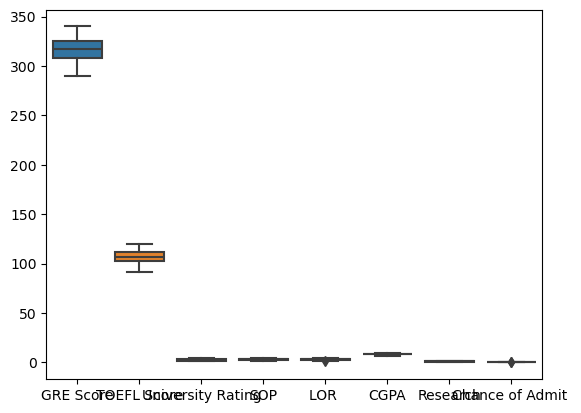

In [60]:
import seaborn as sns
sns.boxplot(data=df)

In [62]:
for i in df:                  
    if df[i].dtypes in ("float64","int64"):
        q1 = df[i].quantile(0.25) 
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

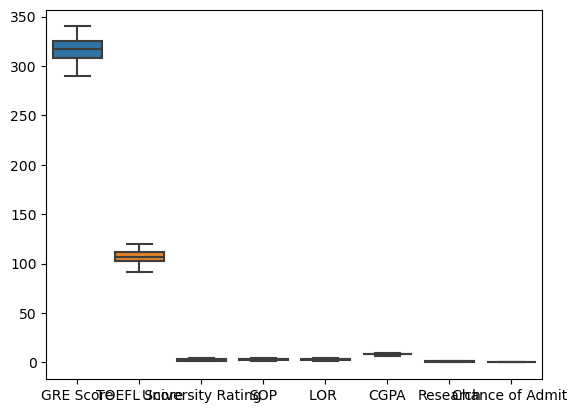

In [64]:
sns.boxplot(data=df)

# Correlation Matrix

In [68]:
df.corr()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524377,0.825878,0.563398,0.810421
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.540630,0.810574,0.467012,0.792292
University Rating,0.635376,0.649799,1.000000,0.728024,0.608241,0.705254,0.427047,0.690257
SOP,0.613498,0.644410,0.728024,1.000000,0.662848,0.712154,0.408116,0.684380
LOR,0.524377,0.540630,0.608241,0.662848,1.000000,0.636923,0.372280,0.644832
CGPA,0.825878,0.810574,0.705254,0.712154,0.636923,1.000000,0.501311,0.882551
Research,0.563398,0.467012,0.427047,0.408116,0.372280,0.501311,1.000000,0.545919
Chance of Admit,0.810421,0.792292,0.690257,0.684380,0.644832,0.882551,0.545919,1.000000


<Axes: >

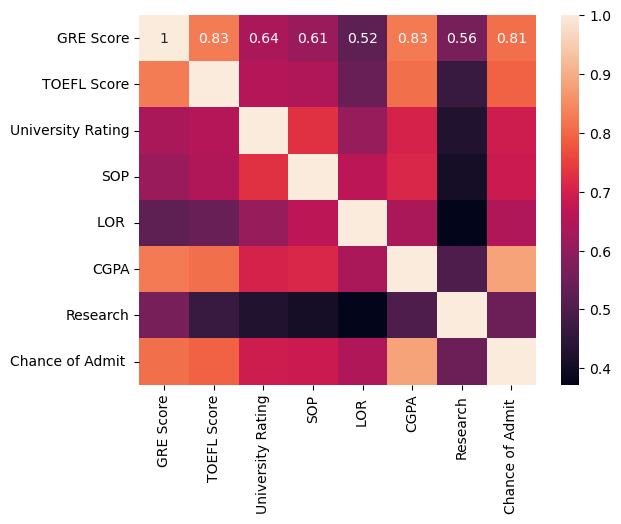

In [73]:
sns.heatmap(df.corr(),annot = True)

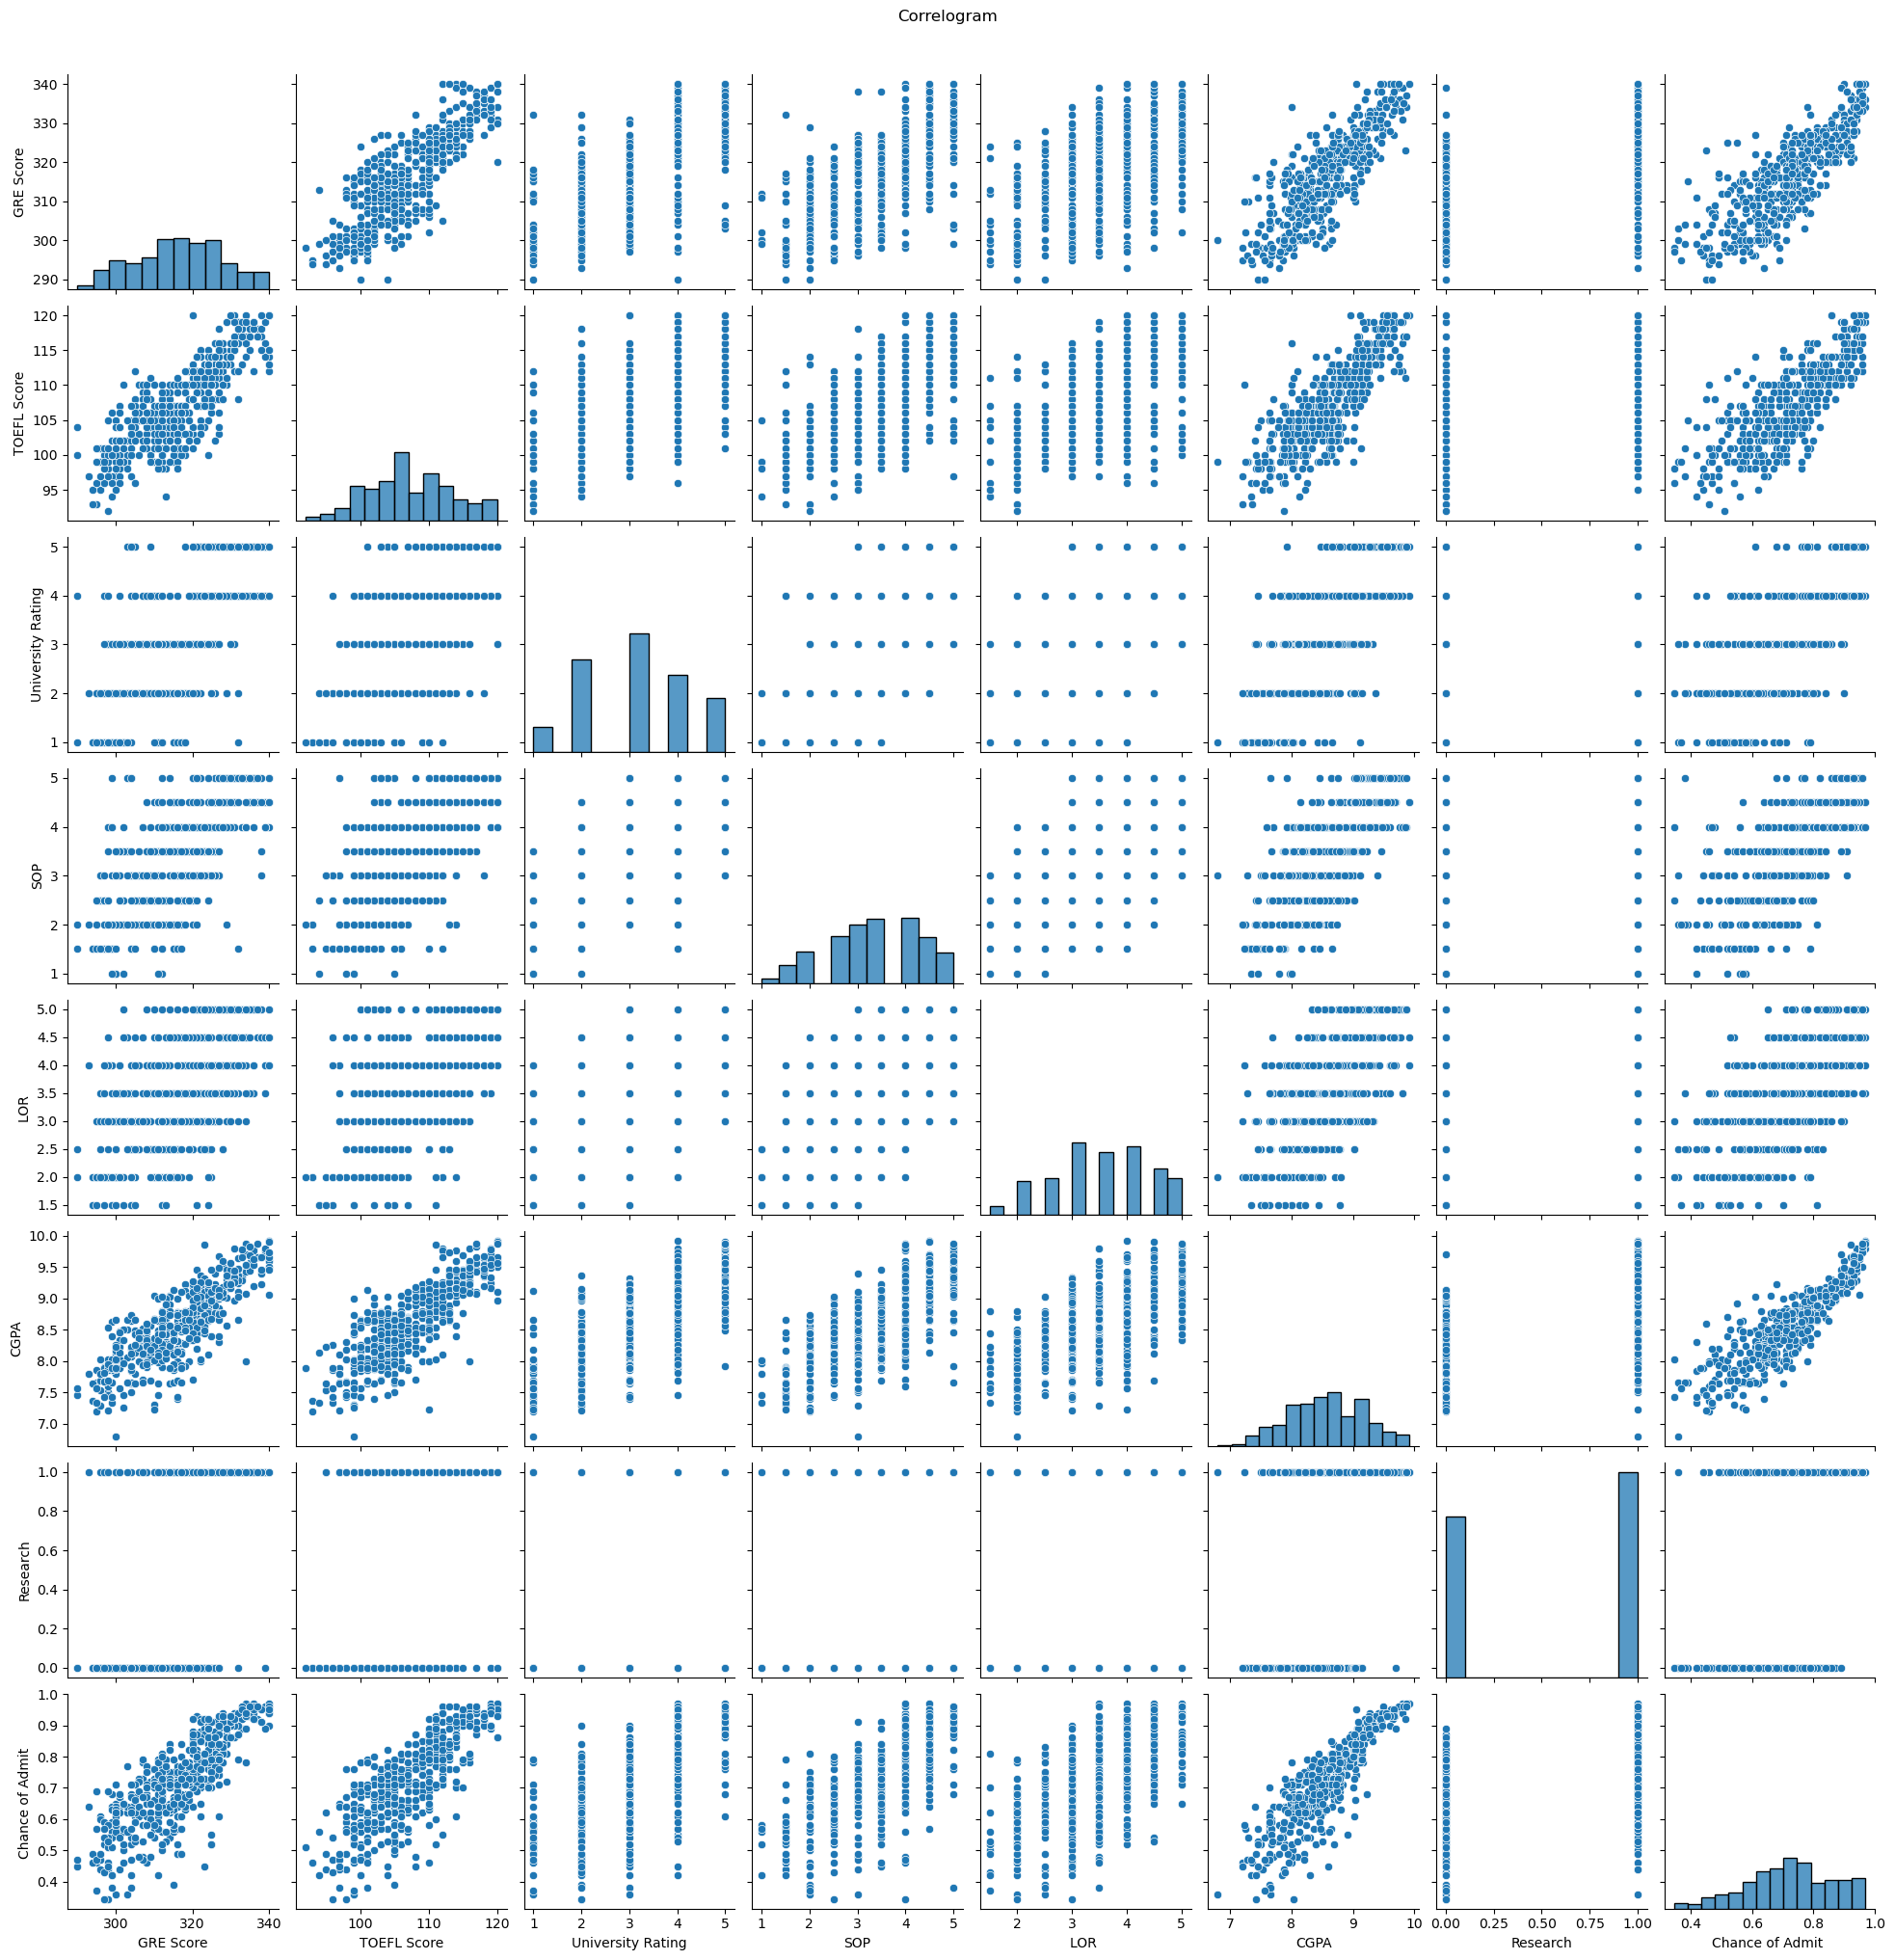

In [75]:
sns.pairplot(df)
plt.suptitle('Correlogram', y=1.02)  # Add a title
plt.show()

## Q.2 Find out the minimum and maximum values for GRE score

In [78]:
min_gre_score = df['GRE Score'].min()
max_gre_score = df['GRE Score'].max()

print(f"Minimum GRE Score: {min_gre_score}")
print(f"Maximum GRE Score: {max_gre_score}")

Minimum GRE Score: 290
Maximum GRE Score: 340


## Q.3 Find out the percentage of universities for each university rating

In [87]:
university_rating_percentages = df['University Rating'].value_counts(normalize=True) * 100

print(university_rating_percentages)

University Rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: proportion, dtype: float64


In [91]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Q4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :

Where 0: Low chance of Admission and 1: High chance of admission

In [109]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x: 1 if x > 0.80 else 0)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


# Q.5

In [338]:
df['Chance of Admit '].value_counts(normalize=True)

Chance of Admit 
0    0.716
1    0.284
Name: proportion, dtype: float64

In [286]:
from sklearn.model_selection import train_test_split

x = df.drop(['Chance of Admit '],axis=1)
y = df[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=23)

In [288]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(350, 7) (150, 7) (350, 1) (150, 1)


In [290]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)  

DecisionTreeClassifier()

In [292]:
train = pd.concat([y_train,X_train],axis=1)
train.head(2)

,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
309,0,308,110,4,3.5,3.0,8.6,0
27,0,298,98,2,1.5,2.5,7.5,1


In [294]:
independent_variable = list(train.columns[1:])
independent_variable

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research']

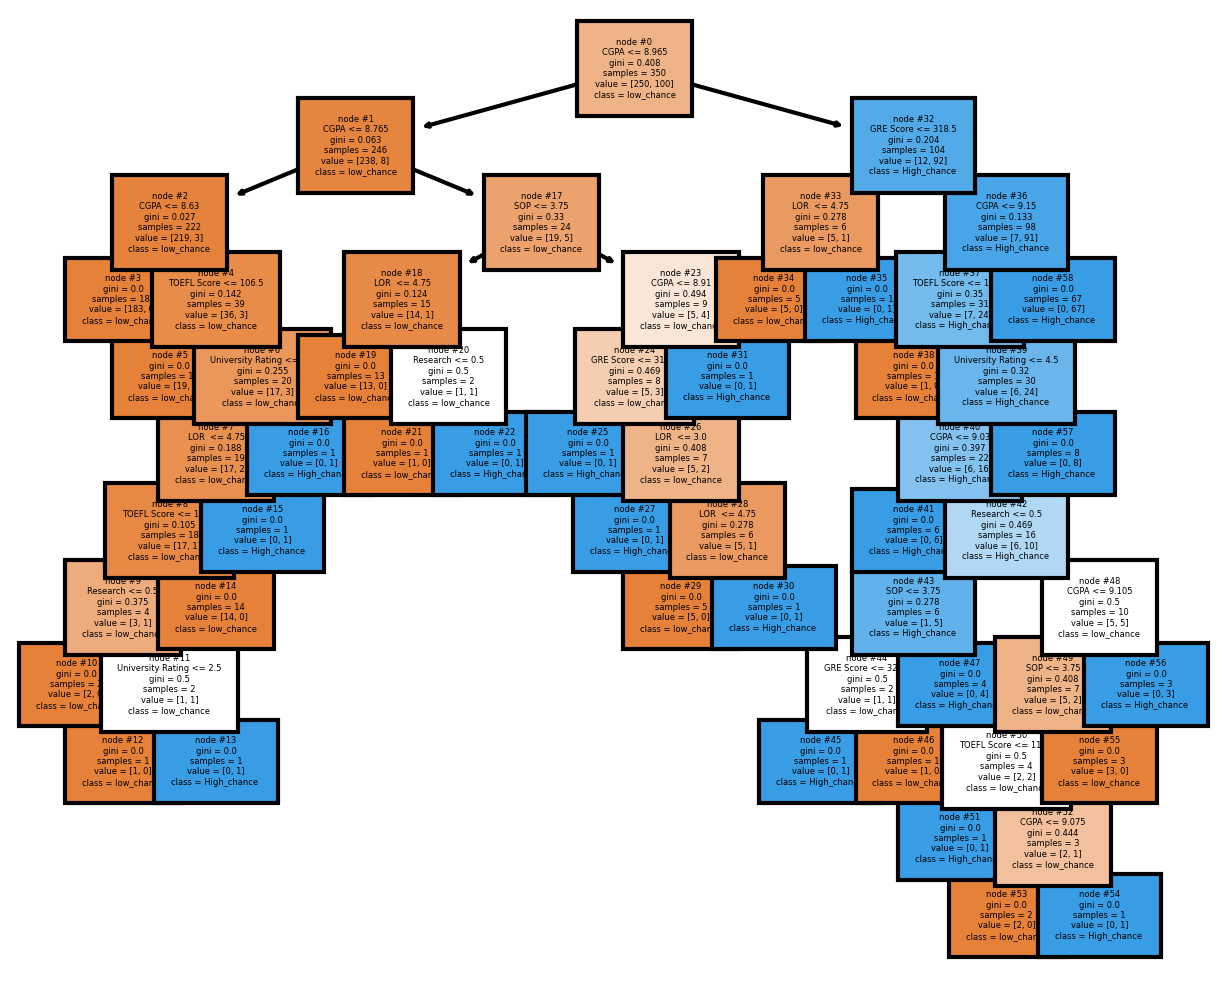

In [296]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Chance_of_Admit = ['low_chance', 'High_chance ']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
plot_tree(dt,  # Model 
               feature_names = independent_variable,  
               class_names = Chance_of_Admit, 
               filled = True, 
              node_ids=True, 
              fontsize=2);


In [298]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
309,0,308,110,4,3.5,3.0,8.60,0,0
27,0,298,98,2,1.5,2.5,7.50,1,0
207,0,310,102,3,3.5,4.0,8.02,1,0
468,1,323,110,4,4.0,5.0,8.88,1,1
361,1,334,116,4,4.0,3.5,9.54,1,1


In [300]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance of Admit '])
print(matrix)

[[250   0]
 [  0 100]]


In [302]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance of Admit '], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       100

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



## Model is overfitting , So we need control overfitting by doing pruning

### Model Improvement by Pruning Method [ Cut Tree]

In [343]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_split=200, #parent 
                                 min_samples_leaf=50, ## child
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

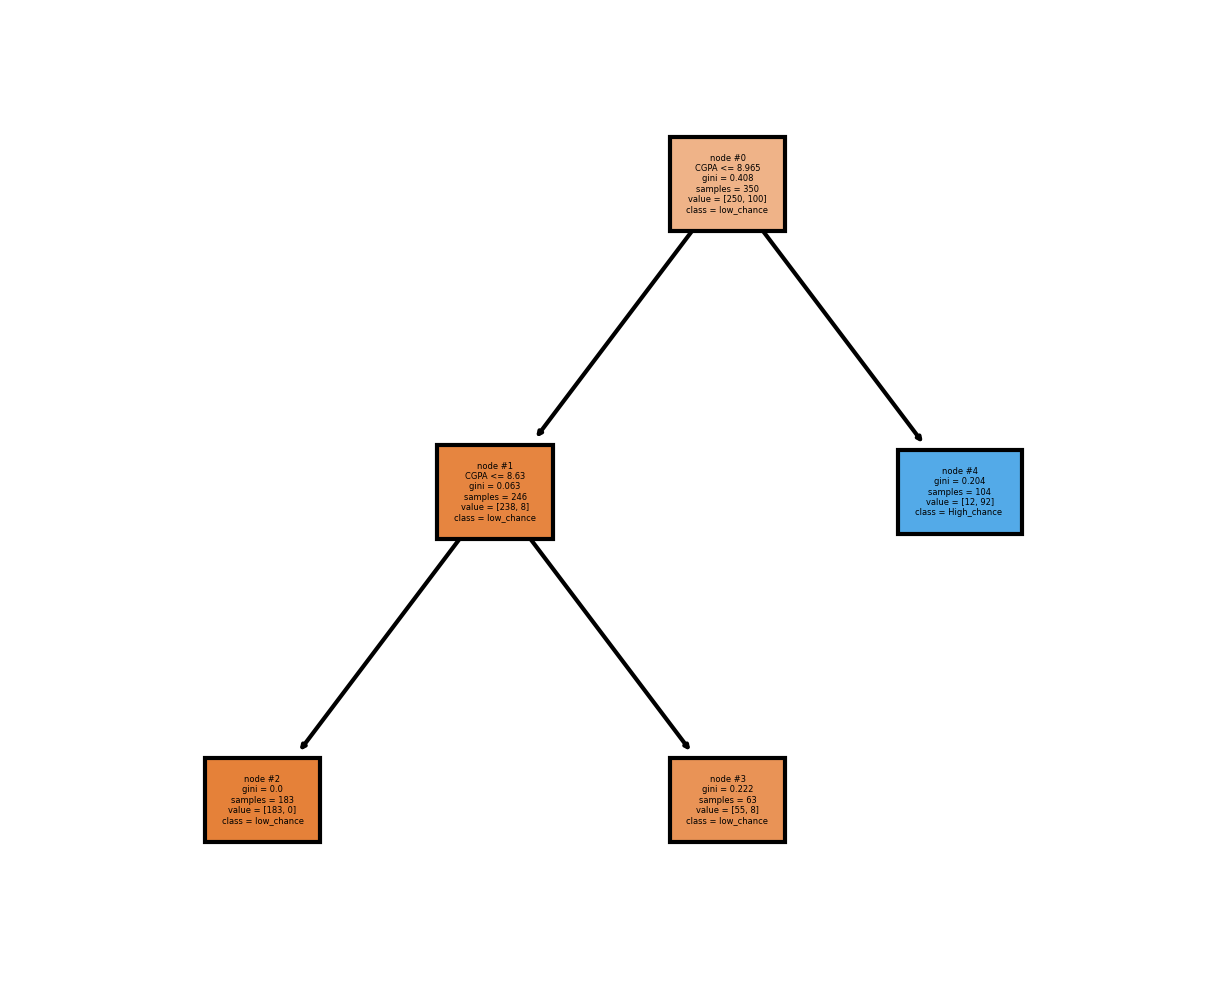

In [345]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Chance_of_Admit = ['low_chance', 'High_chance ']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
plot_tree(dt,  # Model 
               feature_names = independent_variable,  
               class_names = Chance_of_Admit, 
               filled = True, 
              node_ids=True, 
              fontsize=2);

### Strategy & Prediction¶

In [347]:
train['Predicted'] = dt.predict(X_train)  
train.head()

,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
309,0,308,110,4,3.5,3.0,8.60,0,0
27,0,298,98,2,1.5,2.5,7.50,1,0
207,0,310,102,3,3.5,4.0,8.02,1,0
468,1,323,110,4,4.0,5.0,8.88,1,0
361,1,334,116,4,4.0,3.5,9.54,1,1


### Final accuracy of Model after Pruning


In [349]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance of Admit '])
print(matrix)

[[238   8]
 [ 12  92]]


In [353]:
Accuracy_Train=((238  +92)/(350)*100)
print(Accuracy_Train)

94.28571428571428


In [355]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance of Admit '], train['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       250
           1       0.88      0.92      0.90       100

    accuracy                           0.94       350
   macro avg       0.93      0.94      0.93       350
weighted avg       0.94      0.94      0.94       350



### Grid Search Method 

In [357]:
params = { 'min_samples_split': [350,200,250,100], ## Parent 
           'min_samples_leaf': [120,50,100], ## Child or Leave 
           'max_depth':[3,4,5]}

In [359]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [350, 200, 250, 100]},
             verbose=1)

In [360]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200,
                       random_state=42)

### Predictions on Test Dataset

In [363]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
94,303,99,3,2.0,2.5,7.66,0,0
390,314,102,2,2.0,2.5,8.24,0,0
178,309,108,3,2.5,3.0,8.12,0,0
440,305,104,2,2.5,1.5,7.79,0,0
339,324,107,5,3.5,4.0,8.66,1,1


In [365]:
test['predicted'] = dt.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predicted
94,303,99,3,2.0,2.5,7.66,0,0,0
390,314,102,2,2.0,2.5,8.24,0,0,0
178,309,108,3,2.5,3.0,8.12,0,0,0
440,305,104,2,2.5,1.5,7.79,0,0,0
339,324,107,5,3.5,4.0,8.66,1,1,0


In [378]:
test.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'predicted'],
      dtype='object')

## Model Performance Metrics on Test data

In [380]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['predicted'],test['Chance of Admit '])
print(confusion_matrix)

[[98  7]
 [10 35]]


In [388]:
Accuracy_test=((98+35)/(150)*100)
Accuracy_test

88.66666666666667

In [386]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance of Admit '],test['predicted']))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       108
           1       0.78      0.83      0.80        42

    accuracy                           0.89       150
   macro avg       0.86      0.87      0.86       150
weighted avg       0.89      0.89      0.89       150



##### Accuracy of Model is 89%,Hence Model is good Fit
 
 ##### 83% is accuracy of high chance of admission capture by model
 ##### 91% is accuracy of low chance of admission capture by model

# Using Random Forest

In [398]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, 
                               criterion="gini",
                               max_depth=4,  
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt") 

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

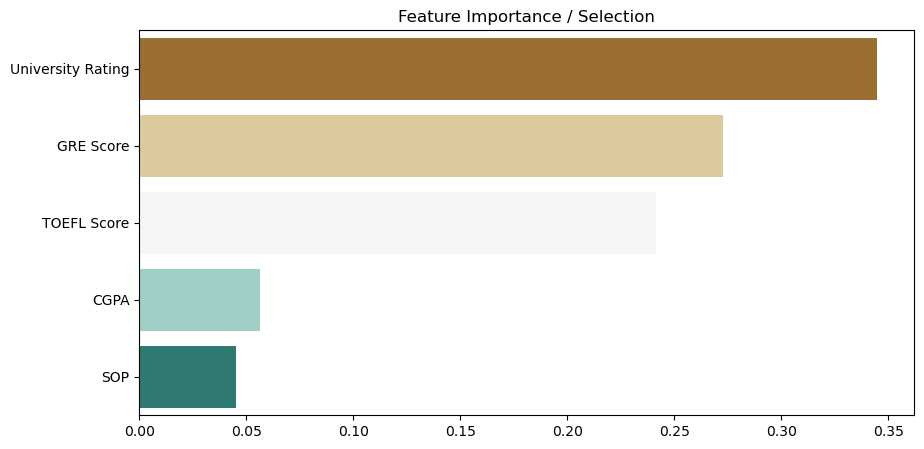

In [400]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

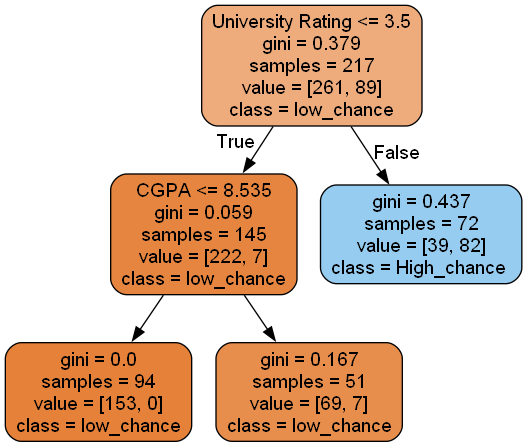

In [406]:
from sklearn.tree import export_graphviz
import pydot

feature_list = list(x.columns)  # all independent variable name
#Churn =  

tree = Model.estimators_[0]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names =['low_chance', 'High_chance '],
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

# Train Data

In [408]:
train_1 = pd.concat([X_train,y_train],axis=1)
train.head()

,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
309,0,308,110,4,3.5,3.0,8.60,0,0
27,0,298,98,2,1.5,2.5,7.50,1,0
207,0,310,102,3,3.5,4.0,8.02,1,0
468,1,323,110,4,4.0,5.0,8.88,1,0
361,1,334,116,4,4.0,3.5,9.54,1,1


In [410]:
train_1['Predicted'] = Model.predict(X_train)
train_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Predicted
309,308,110,4,3.5,3.0,8.60,0,0,0
27,298,98,2,1.5,2.5,7.50,1,0,0
207,310,102,3,3.5,4.0,8.02,1,0,0
468,323,110,4,4.0,5.0,8.88,1,1,1
361,334,116,4,4.0,3.5,9.54,1,1,1


In [412]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_1['Predicted'],train_1['Chance of Admit '])
print(confusion_matrix)

[[236  13]
 [ 14  87]]


In [428]:
Accuracy_train=((236+87)/(350)*100)
Accuracy_train

92.28571428571428

In [416]:
from sklearn.metrics import classification_report
print(classification_report(train_1['Predicted'],train_1['Chance of Admit ']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       249
           1       0.87      0.86      0.87       101

    accuracy                           0.92       350
   macro avg       0.91      0.90      0.91       350
weighted avg       0.92      0.92      0.92       350



# Test Data

In [418]:
test_1 = pd.concat([X_test,y_test],axis=1)
test_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
94,303,99,3,2.0,2.5,7.66,0,0
390,314,102,2,2.0,2.5,8.24,0,0
178,309,108,3,2.5,3.0,8.12,0,0
440,305,104,2,2.5,1.5,7.79,0,0
339,324,107,5,3.5,4.0,8.66,1,1


In [420]:
test_1['Predicted'] = Model.predict(X_test)
test_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Predicted
94,303,99,3,2.0,2.5,7.66,0,0,0
390,314,102,2,2.0,2.5,8.24,0,0,0
178,309,108,3,2.5,3.0,8.12,0,0,0
440,305,104,2,2.5,1.5,7.79,0,0,0
339,324,107,5,3.5,4.0,8.66,1,1,0


In [422]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_1['Predicted'],test_1['Chance of Admit '])
print(confusion_matrix)

[[101  10]
 [  7  32]]


In [424]:
Accuracy_test=((101+32)/(150)*100)
Accuracy_test

88.66666666666667

In [426]:
from sklearn.metrics import classification_report
print(classification_report(test_1['Predicted'],test_1['Chance of Admit ']))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       111
           1       0.76      0.82      0.79        39

    accuracy                           0.89       150
   macro avg       0.85      0.87      0.86       150
weighted avg       0.89      0.89      0.89       150



Accuracy of Model is 89%,Hence Model is good Fit

Accuracy of high chance of Admission  Capture by Model is 82% ( Sensitivity )

Accuracy of low chance of Admission Capture by Model is 91% (Specificity)

# Compare all of the models and justify your choice about the optimum model.


### we can say that both models accuracy has same we can choose any one of them,
#### But my opinon that are,
in Test
1st Model are give us 93 % accuracy of low chance of admission capture by Model and
2nd Model are give us 82% accuracy of high chance of admission capture by Model

we can say that Decision Tree method is give low sensetivity .
we prefer Decision Tree